train data =  60000
test  data =  10000
x_train_images: (60000, 28, 28)
y_train_labels: (60000,)


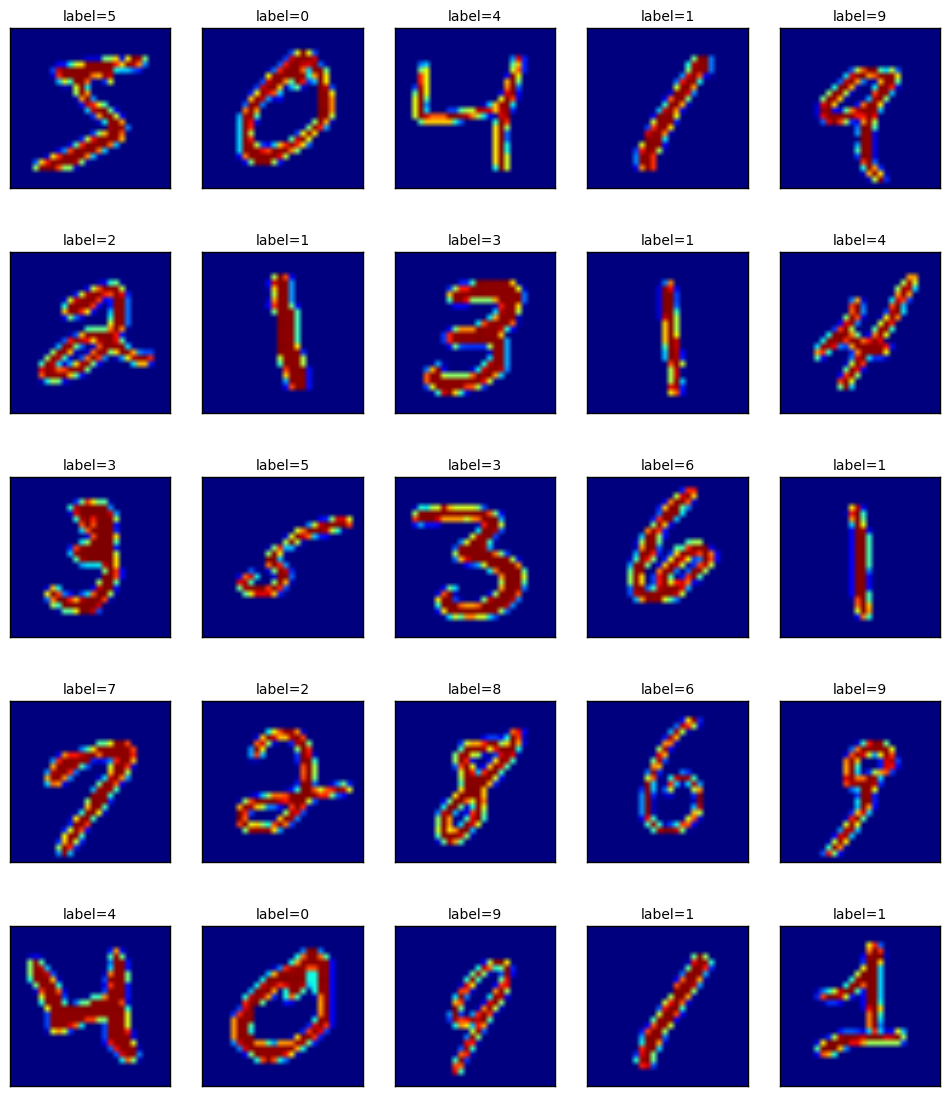

x_train: (60000, 784)
x_test : (10000, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
1s - loss: 0.4375 - acc: 0.8831 - val_loss: 0.2179 - val_acc: 0.9410
Epoch 2/10
1s - loss: 0.1908 - acc: 0.9454 - val_loss: 0.1555 - val_acc: 0.9562
Epoch 3/10
1s - loss: 0.1354 - acc: 0.9617 - val_loss: 0.1257 - val_acc: 0.9649
Epoch 4/10
1s - loss: 0.1025 - acc: 0.9702 - val_loss: 0.1122 - val_acc: 0.9680
Epoch 5/10
1s - loss: 0.0808 - acc: 0.9774 - val_loss: 0.0982 - val_acc: 0.9716
Epoch 6/10
1s - loss: 0.0658 - ac

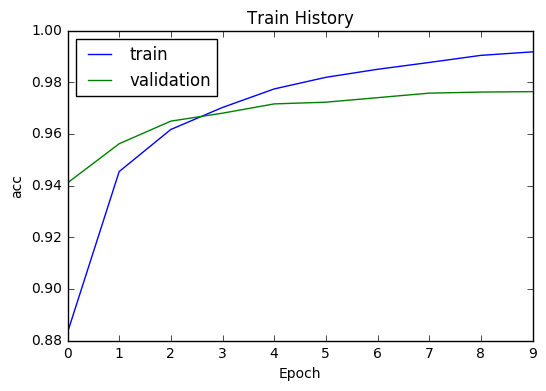

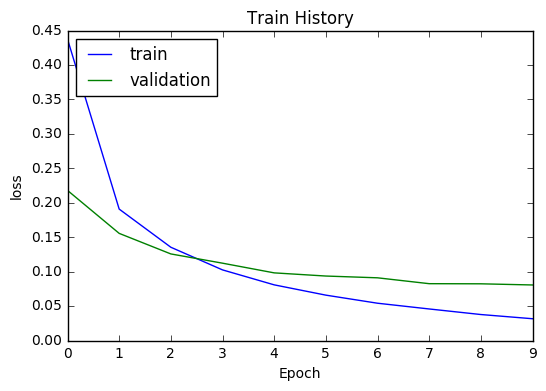

 9376/10000 [===========================>..] - ETA: 0s

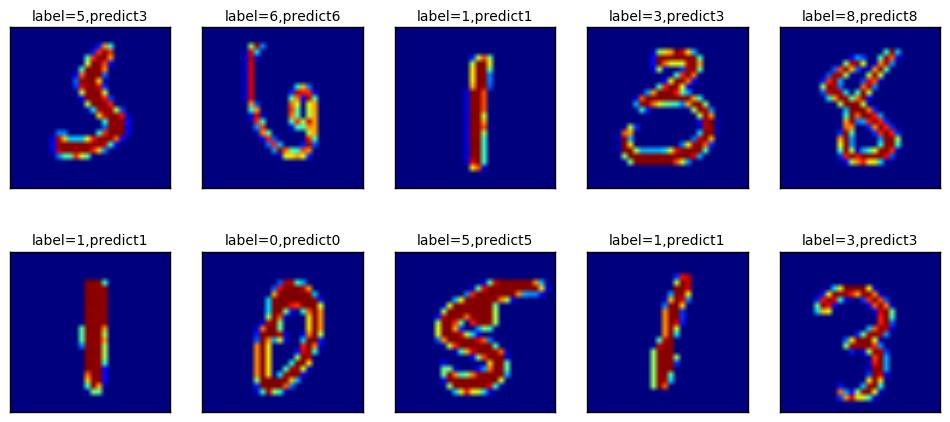

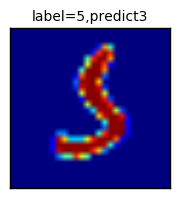

In [2]:
#Using libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
np.random.seed(10)
#___________________________________________________________________________________________________________________

#Design of function
def plot_image(image):
     fig = plt.gcf()
     fig.set_size_inches(2,2)
     plt.imshow(image)
     plt.show()

def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #image of size in figure
    if num>25: num=25
    for i in range(num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx])
        title ="label="+str(labels[idx])
        if len(prediction)>0 : 
            title+=",predict"+str(prediction[idx]) 
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])#not display scale on figure
        idx+=1
    plt.show()

def show_train_history(train_history,train,Validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[Validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    


#___________________________________________________________________________________________________________________
# MAIN
# Dataflow
#  we have 60000 of data to split two part, 48000 of data for train , 12000 of data for validation 

# tensorflow model is "Sequential"
# input layer, 784 ,60000
# hidden layer 1 ,256, (784*256+256) =200960 ,relu
#    - not using drogout   
# output layer, 10, (256*10+10)=2570


#(1)download data from mnist
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

#anaysis data
print('train data = ',len(x_train_image))
print('test  data = ',len(x_test_image))
print('x_train_images:',x_train_image.shape)
print('y_train_labels:',y_train_label.shape)

#demo - dataset of image 
#for n in range(10):plot_image(x_train_image[n])
plot_image_labels_prediction(x_train_image,y_train_label,[],0,10)

#(2)pre-size
#reshape
x_train = x_train_image.reshape(60000,784).astype('float32')
x_test  = x_test_image.reshape(10000,784).astype('float32')

#after-size
print('x_train:',x_train.shape)
print('x_test :',x_test .shape)

#normalize
x_train_normalize = x_train/255
y_test_normalize  = x_test/255

 #label
y_train_label[:5]


#OntHot encoding(Prepocess)
y_trainOneHot = np_utils.to_categorical(y_train_label)
y_testOneHot  = np_utils.to_categorical(y_test_label)
y_trainOneHot[:5]

#(3) Train - Tensorflow
#build Model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

#setting loss,optimzier, metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#train
train_history = model.fit(x = x_train_normalize, y = y_trainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

#(4) display reslut, show, score, predict
#display-Reslut
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

#score
scores = model.evaluate(y_test_normalize, y_testOneHot)
print('accuary=',scores[1])

#predict
prediction = model.predict_classes(x_test)
prediction #prdiction has package of 10 data
plot_image_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

#(5)#check-ERROR
#Confusion matrix
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

#dataframe
df = pd.DataFrame({'label':y_test_label,'predict':prediction})#df[:2]
df[(df.label==5)&(df.predict==3)]

#check
plot_image_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

train data =  60000
test  data =  10000
x_train_images: (60000, 28, 28)
y_train_labels: (60000,)


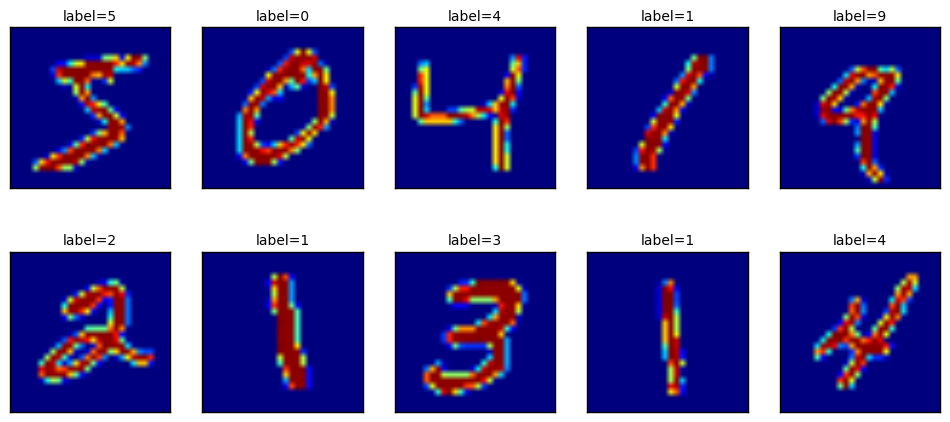

x_train: (60000, 784)
x_test : (10000, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
5s - loss: 0.2918 - acc: 0.9162 - val_loss: 0.1538 - val_acc: 0.9561
Epoch 2/10
4s - loss: 0.1151 - acc: 0.9671 - val_loss: 0.1216 - val_acc: 0.9636
Epoch 3/10
4s - loss: 0.0737 - acc: 0.9791 - val_loss: 0.0923 - val_acc: 0.9731
Epoch 4/10
4s - loss: 0.0522 - acc: 0.9855 - val_loss: 0.0818 - val_acc: 0.9746
Epoch 5/10
4s - loss: 0.0360 - acc: 0.9902 - val_loss: 0.0833 - val_acc: 0.9748
Epoch 6/10
4s - loss: 0.0249 - ac

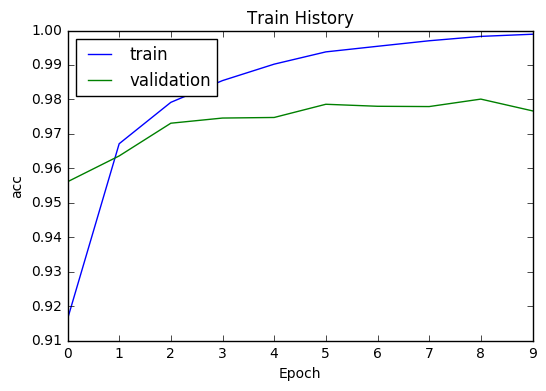

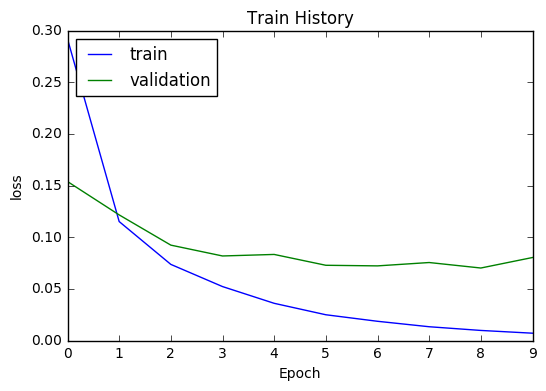

 9472/10000 [===========================>..] - ETA: 0s

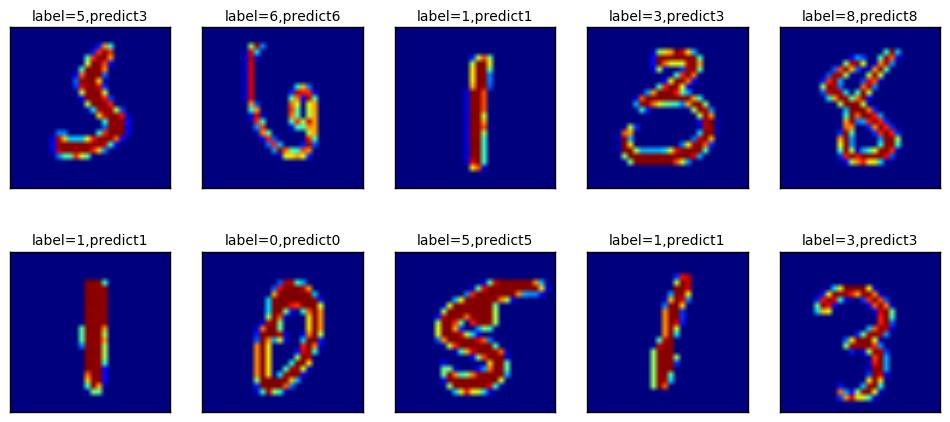

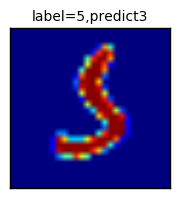

In [3]:

#___________________________________________________________________________________________________________________
# MAIN
# Dataflow
#  we have 60000 of data to split two part, 48000 of data for train , 12000 of data for validation 

# tensorflow model is "Sequential"
# input layer, 784 ,60000
# hidden layer 1 ,1000 ,relu
#    - not using drogout   
# output layer, 10


#(1)download data from mnist
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

#anaysis data
print('train data = ',len(x_train_image))
print('test  data = ',len(x_test_image))
print('x_train_images:',x_train_image.shape)
print('y_train_labels:',y_train_label.shape)

#demo - dataset of image 
#for n in range(10):plot_image(x_train_image[n])
plot_image_labels_prediction(x_train_image,y_train_label,[],0,10)

#(2)pre-size
#reshape
x_train = x_train_image.reshape(60000,784).astype('float32')
x_test  = x_test_image.reshape(10000,784).astype('float32')

#after-size
print('x_train:',x_train.shape)
print('x_test :',x_test .shape)

#normalize
x_train_normalize = x_train/255
y_test_normalize  = x_test/255

 #label
y_train_label[:5]


#OntHot encoding(Prepocess)
y_trainOneHot = np_utils.to_categorical(y_train_label)
y_testOneHot  = np_utils.to_categorical(y_test_label)
y_trainOneHot[:5]

#(3) Train - Tensorflow
#build Model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

#setting loss,optimzier, metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#train
train_history = model.fit(x = x_train_normalize, y = y_trainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

#(4) display reslut, show, score, predict
#display-Reslut
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

#score
scores = model.evaluate(y_test_normalize, y_testOneHot)
print('accuary=',scores[1])

#predict
prediction = model.predict_classes(x_test)
prediction #prdiction has package of 10 data
plot_image_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

#(5)#check-ERROR
#Confusion matrix
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

#dataframe
df = pd.DataFrame({'label':y_test_label,'predict':prediction})#df[:2]
df[(df.label==5)&(df.predict==3)]

#check
plot_image_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)